In [1]:
import pandas as pd
import numpy as np
from multiscaleio.core.expansions import ReshiftedExpansion, MultiscaleExpansion

In [2]:
test = pd.read_csv("../data/DailyDelhiClimateTest.csv")
train = pd.read_csv("../data/DailyDelhiClimateTrain.csv")

In [3]:
train

,date,meantemp,humidity,wind_speed,meanpressure
0,2013-01-01,10.000000,84.500000,0.000000,1015.666667
1,2013-01-02,7.400000,92.000000,2.980000,1017.800000
2,2013-01-03,7.166667,87.000000,4.633333,1018.666667
3,2013-01-04,8.666667,71.333333,1.233333,1017.166667
4,2013-01-05,6.000000,86.833333,3.700000,1016.500000
...,...,...,...,...,...
1457,2016-12-28,17.217391,68.043478,3.547826,1015.565217
1458,2016-12-29,15.238095,87.857143,6.000000,1016.904762
1459,2016-12-30,14.095238,89.666667,6.266667,1017.904762
1460,2016-12-31,15.052632,87.000000,7.325000,1016.100000


In [4]:
rs = ReshiftedExpansion(window=4, date_col="date", keep_t0=True)
data = rs.fit_transform(train)

In [5]:
sh = pd.DataFrame(data, columns=rs.get_feature_names_out())
sh.head()

,date,meantemp,humidity,wind_speed,meanpressure,meantemp_shift_1,humidity_shift_1,wind_speed_shift_1,meanpressure_shift_1,meantemp_shift_2,humidity_shift_2,wind_speed_shift_2,meanpressure_shift_2,meantemp_shift_3,humidity_shift_3,wind_speed_shift_3,meanpressure_shift_3
0,2013-01-01,10.0,84.5,0.0,1015.666667,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2013-01-02,7.4,92.0,2.98,1017.8,10.0,84.5,0.0,1015.666667,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2013-01-03,7.166667,87.0,4.633333,1018.666667,7.4,92.0,2.98,1017.8,10.0,84.5,0.0,1015.666667,NaN,NaN,NaN,NaN
3,2013-01-04,8.666667,71.333333,1.233333,1017.166667,7.166667,87.0,4.633333,1018.666667,7.4,92.0,2.98,1017.8,10.0,84.5,0.0,1015.666667
4,2013-01-05,6.0,86.833333,3.7,1016.5,8.666667,71.333333,1.233333,1017.166667,7.166667,87.0,4.633333,1018.666667,7.4,92.0,2.98,1017.8


In [6]:
ms = MultiscaleExpansion(scale=[3, 7], date_col="date")
data = ms.fit_transform(sh)

In [7]:
sc = pd.DataFrame(data, columns=ms.get_feature_names_out())
sc.head()

,date,meantemp_mean_3,humidity_mean_3,wind_speed_mean_3,meanpressure_mean_3,meantemp_shift_1_mean_3,humidity_shift_1_mean_3,wind_speed_shift_1_mean_3,meanpressure_shift_1_mean_3,meantemp_shift_2_mean_3,...,wind_speed_shift_1_mean_7,meanpressure_shift_1_mean_7,meantemp_shift_2_mean_7,humidity_shift_2_mean_7,wind_speed_shift_2_mean_7,meanpressure_shift_2_mean_7,meantemp_shift_3_mean_7,humidity_shift_3_mean_7,wind_speed_shift_3_mean_7,meanpressure_shift_3_mean_7
0,2013-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2013-01-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2013-01-03,8.188889,87.833333,2.537778,1017.377778,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2013-01-04,7.744444,83.444444,2.948889,1017.877778,8.188889,87.833333,2.537778,1017.377778,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2013-01-05,7.277778,81.722222,3.188889,1017.444444,7.744444,83.444444,2.948889,1017.877778,8.188889,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
train_eda = train.copy()
train_eda["month"] = pd.to_datetime(train["date"]).dt.month

In [9]:
from multiscaleio.core.interpolate import ProphetInterpolator

pdata = train[["date", "humidity"]].reset_index(drop=True).copy()
pdata["humidity"][int(len(pdata)/1.15):] = np.nan
pi = ProphetInterpolator(
    date_index="date", 
    uncertainty_fit_logs=True, 
    add_sampled_uncertainty=True,
    weekly_seasonality=False,
    growth="flat"
)
int_ = pi.fit_transform(pdata)

c:\Users\Tobia\anaconda3\envs\multiscaleio\lib\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
Importing plotly failed. Interactive plots will not work.
C:\Users\Tobia\AppData\Local\Temp\ipykernel_16212\380245298.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pdata["humidity"][int(len(pdata)/1.15):] = np.nan
c:\Users\Tobia\anaconda3\envs\multiscaleio\lib\site-packages\multiscaleio\common\validate.py:24: UserWarning: Quote of missing values in passed array is greater than 35% so imputing them could lead to unexpected future behaviours. Consider excluding it from the analysis.
  warnings.warn(
c:\Users\Tobia\anaconda3\envs\multisca

<AxesSubplot: >

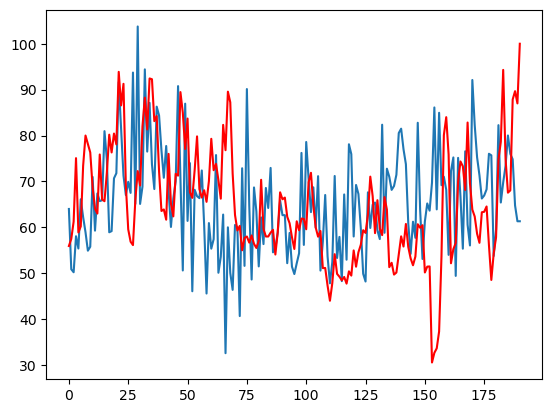

In [10]:
nan_idx = pdata[pdata["humidity"].isna()].index.to_list()

pd.Series(int_[nan_idx]).plot()
train["humidity"].iloc[nan_idx].reset_index(drop=True).plot(c="r")

<AxesSubplot: >

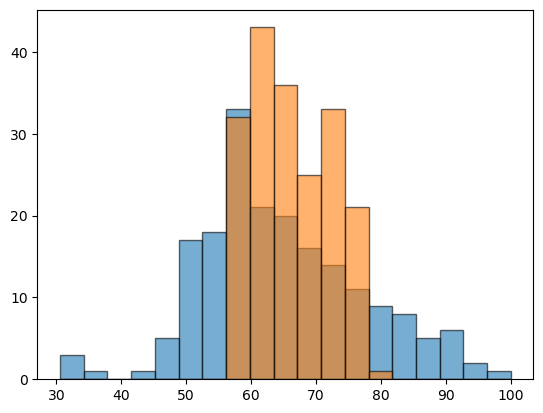

In [246]:
min_ = min(int_[nan_idx].min(), train["humidity"].iloc[nan_idx].min())
max_ = max(int_[nan_idx].max(), train["humidity"].iloc[nan_idx].max())

train["humidity"].iloc[nan_idx].reset_index(drop=True).hist(bins=np.linspace(min_, max_, 20), ec="k", grid=False, alpha=.6)
pd.Series(int_[nan_idx]).hist(bins=np.linspace(min_, max_, 20), ec="k", grid=False, alpha=.6)

In [247]:
from statsmodels.graphics.tsaplots import plot_pacf

err = (train["humidity"].values[nan_idx] - int_[nan_idx])

c:\Users\Tobia\anaconda3\envs\multiscaleio\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


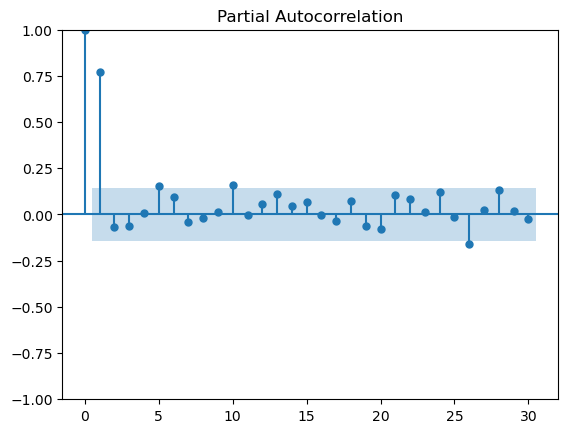

In [292]:
pf = plot_pacf(pd.Series(err).dropna(), lags=30)

In [281]:
from arch import arch_model

garch_model = arch_model(pd.Series(err).diff().dropna(), vol='Garch', p=2, q=2, dist='t')
garch_fit = garch_model.fit()

# Forecast future variances (conditional variances)
forecast_variances = garch_fit.forecast(horizon=len(err))#.variance[-1, :]

Iteration:      1,   Func. Count:      9,   Neg. LLF: 842.9682571478243
Iteration:      2,   Func. Count:     19,   Neg. LLF: 654.0746148820804
Iteration:      3,   Func. Count:     28,   Neg. LLF: 698.3315948515442
Iteration:      4,   Func. Count:     38,   Neg. LLF: 650.843401281667
Iteration:      5,   Func. Count:     47,   Neg. LLF: 648.9730848379506
Iteration:      6,   Func. Count:     56,   Neg. LLF: 650.669473530847
Iteration:      7,   Func. Count:     65,   Neg. LLF: 649.2978100784023
Iteration:      8,   Func. Count:     74,   Neg. LLF: 648.4438337328563
Iteration:      9,   Func. Count:     82,   Neg. LLF: 649.1590390685012
Iteration:     10,   Func. Count:     91,   Neg. LLF: 648.3368941289295
Iteration:     11,   Func. Count:    100,   Neg. LLF: 648.14300832611
Iteration:     12,   Func. Count:    108,   Neg. LLF: 648.1443775285029
Iteration:     13,   Func. Count:    117,   Neg. LLF: 648.1072198161222
Iteration:     14,   Func. Count:    125,   Neg. LLF: 648.1065927969

<AxesSubplot: >

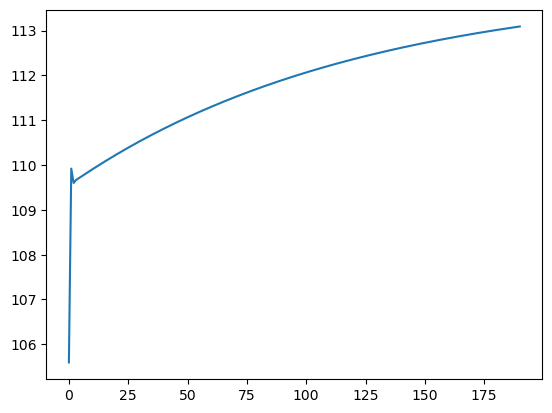

In [282]:
pd.Series(forecast_variances.variance.values[-1, :]).plot()

In [283]:
var_fc = forecast_variances.variance.values[-1, :]
oscillations = np.random.normal(loc=0, scale=np.sqrt(var_fc) * 0.5)
# oscillations = forecast_variances.variance.values[-1, :]
# forecast_variances.T.values

In [284]:
final_forecast = int_[nan_idx] + pd.Series(oscillations)

<AxesSubplot: >

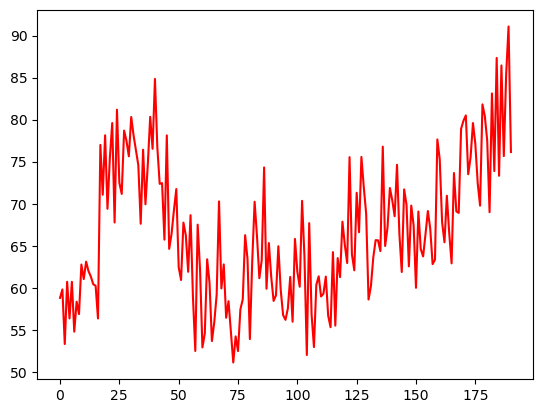

In [286]:
# train["humidity"].iloc[nan_idx].reset_index(drop=True).plot(zorder=3, c="k")
final_forecast.plot(c="r")

In [275]:
train["humidity"].iloc[nan_idx].reset_index(drop=True)

0       55.928571
1       57.466667
2       61.250000
3       75.071429
4       58.875000
          ...    
186     68.043478
187     87.857143
188     89.666667
189     87.000000
190    100.000000
Name: humidity, Length: 191, dtype: float64

In [276]:
final_forecast

0      37.163187
1      60.357448
2      55.904659
3      65.547344
4      71.649572
         ...    
186    77.239345
187    71.275252
188    73.893473
189    77.004887
190    85.981161
Length: 191, dtype: float64

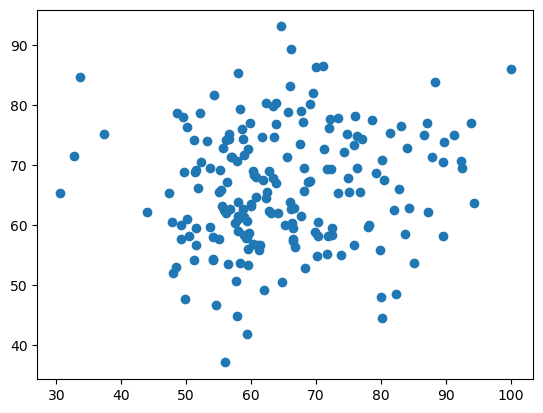

In [277]:
import matplotlib.pyplot as plt

plt.scatter(train["humidity"].iloc[nan_idx].reset_index(drop=True), final_forecast)

<AxesSubplot: >

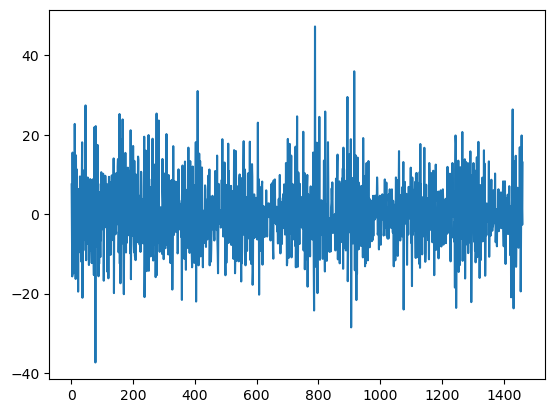

In [222]:
from multiscaleio.core.time_utils import ts_hsched_test

train["humidity"].diff().plot()